Load & Prepare Data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv("output/uidai_master_clean.csv")
df["date"] = pd.to_datetime(df["date"], errors="coerce")


Monthly Aggregation

In [6]:
monthly = (
    df.groupby(pd.Grouper(key="date", freq="M"))
    .sum(numeric_only=True)
    .reset_index()
)

monthly["time_index"] = np.arange(len(monthly))


C:\Users\HP\AppData\Local\Temp\ipykernel_29320\3510464890.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key="date", freq="M"))


Train ML Models

In [7]:
X = monthly[["time_index"]]

y_enrol = monthly["total_enrolment"]
y_bio = monthly["total_biometric_updates"]
y_demo = monthly["total_demographic_updates"]

model_enrol = LinearRegression()
model_bio = LinearRegression()
model_demo = LinearRegression()

model_enrol.fit(X, y_enrol)
model_bio.fit(X, y_bio)
model_demo.fit(X, y_demo)


LinearRegression()

Forecast NEXT 6 MONTHS

In [8]:
future_steps = 6
future_index = np.arange(len(monthly), len(monthly) + future_steps).reshape(-1, 1)

future_dates = pd.date_range(
    start=monthly["date"].max(),
    periods=future_steps + 1,
    freq="M"
)[1:]

forecast = pd.DataFrame({
    "date": future_dates,
    "enrolment_forecast": model_enrol.predict(future_index),
    "biometric_forecast": model_bio.predict(future_index),
    "demographic_forecast": model_demo.predict(future_index)
})

forecast


C:\Users\HP\AppData\Local\Temp\ipykernel_29320\2633671436.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(
c:\Users\HP\anaconda3\anaconda34\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\HP\anaconda3\anaconda34\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\HP\anaconda3\anaconda34\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,date,enrolment_forecast,biometric_forecast,demographic_forecast
0,2026-01-31,443956.848485,-1.777229e+06,3.152145e+06
1,2026-02-28,461030.414918,-2.822157e+06,3.160689e+06
2,2026-03-31,478103.981352,-3.867085e+06,3.169234e+06
3,2026-04-30,495177.547786,-4.912014e+06,3.177778e+06
4,2026-05-31,512251.114219,-5.956942e+06,3.186323e+06
5,2026-06-30,529324.680653,-7.001870e+06,3.194867e+06


FORECAST VISUAL

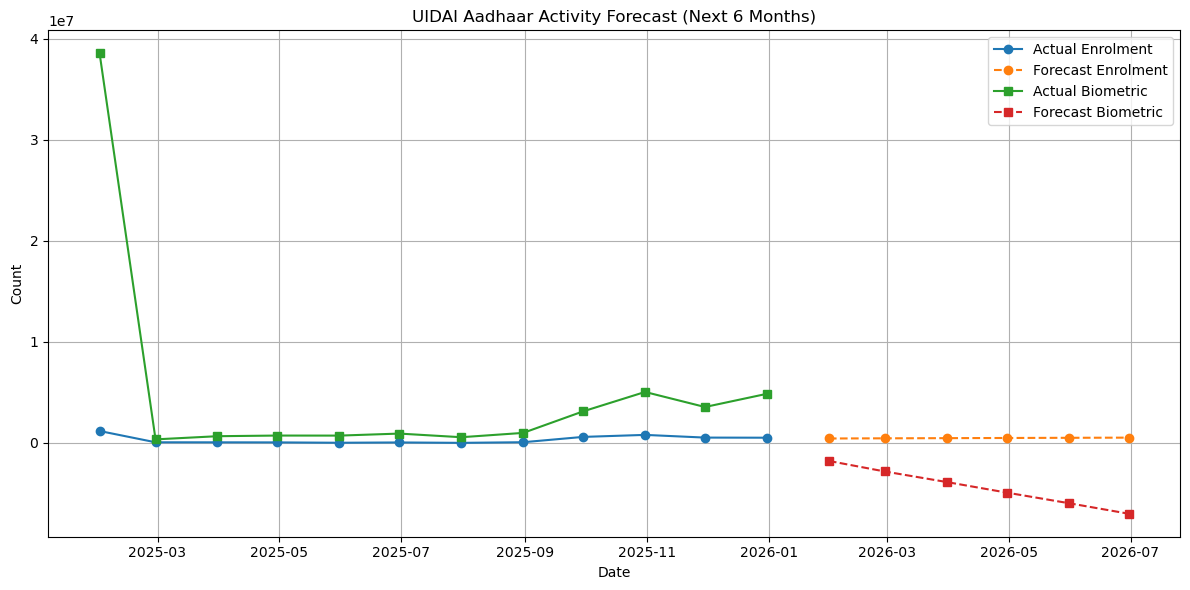

In [11]:
plt.figure(figsize=(12,6))

plt.plot(monthly["date"], y_enrol, marker="o", label="Actual Enrolment")
plt.plot(forecast["date"], forecast["enrolment_forecast"],
         linestyle="--", marker="o", label="Forecast Enrolment")

plt.plot(monthly["date"], y_bio, marker="s", label="Actual Biometric")
plt.plot(forecast["date"], forecast["biometric_forecast"],
         linestyle="--", marker="s", label="Forecast Biometric")

plt.title("UIDAI Aadhaar Activity Forecast (Next 6 Months)")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
